In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D, MaxPool2D, MaxPool1D
from keras.utils import to_categorical

### Descargamos el dataset

In [0]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


###Análisis exploratorio

(60000, 28, 28)

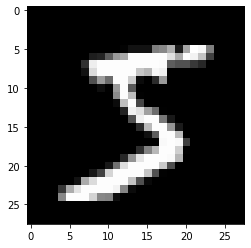

In [0]:
#plot the first image in the dataset
plt.imshow(X_train[0],cmap='gray')

#check image shape
X_train.shape    

###Preprocesamiento de los datos

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1) # 60000= n de imagenes, 28x28= tamanio imagen, 1= dimensiones de color
X_test = X_test.reshape(10000,28,28,1)

In [0]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

###Calculo de pesos
 Input de 28x28 \\
 Primera capa 3x3, 9 pesos x neurona, 9 pesos x capa \\
 9 x 64 = 576 pesos + 64 bias \\
 Segunda capa 3x3x64, 32 capas = 18.432 pesos + 32 bias \\
 Resultado de la segunda es un cubo de 24x24x32 = 18.432 x 10 = 184.320 + 10 bias \\
 203.434 parametros entrenables

###Construccion del modelo

In [0]:
#create model
model = Sequential()  
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

###Compilando modelo

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


###Entrenando el modelo

In [0]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 8s 133us/step - loss: 0.2657 - accuracy: 0.9501 - val_loss: 0.0859 - val_accuracy: 0.9736
Epoch 2/15
60000/60000 [==============================] - 8s 126us/step - loss: 0.0683 - accuracy: 0.9795 - val_loss: 0.0927 - val_accuracy: 0.9771
Epoch 3/15
60000/60000 [==============================] - 7s 125us/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0927 - val_accuracy: 0.9775
Epoch 4/15
60000/60000 [==============================] - 7s 122us/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.1036 - val_accuracy: 0.9723
Epoch 5/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0992 - val_accuracy: 0.9775
Epoch 6/15
60000/60000 [==============================] - 8s 129us/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.1257 - val_accuracy: 0.9764
Epoch 7/15
60000/60000 [==============================] - 7s 1

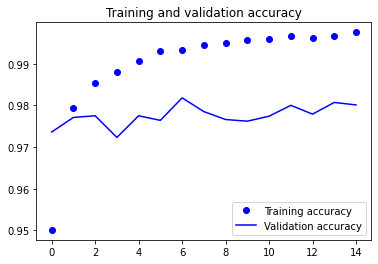

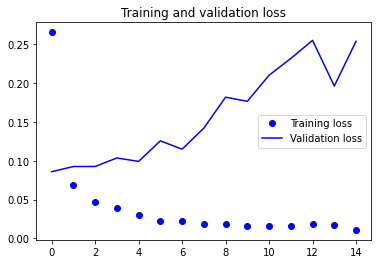

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Ahora usando redes feed-forward

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model2 = Sequential()
model2.add(Dense(200, activation='relu', input_shape=(dimData,)))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(10, activation='softmax'))
print(model2.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_54 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 15us/step - loss: 0.3437 - accuracy: 0.9040 - val_loss: 0.1617 - val_accuracy: 0.9498
Epoch 2/15
60000/60000 [==============================] - 1s 14us/step - loss: 0.1318 - accuracy: 0.9612 - val_loss: 0.1043 - val_accuracy: 0.9679
Epoch 3/15
60000/60000 [==============================] - 1s 14us/step - loss: 0.0880 - accuracy: 0.9739 - val_loss: 0.0895 - val_accuracy: 0.9734
Epoch 4/15
60000/60000 [==============================] - 1s 14us/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0786 - val_accuracy: 0.9757
Epoch 5/15
60000/60000 [==============================] - 1s 14us/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 6/15
60000/60000 [==============================] - 1s 14us/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0710 - val_accuracy: 0.9771
Epoch 7/15
60000/60000 [==============================] - 1s 14us/st

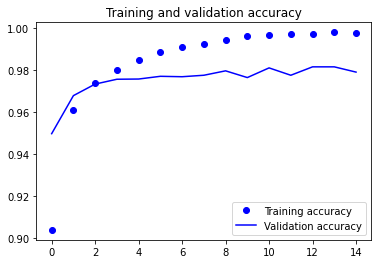

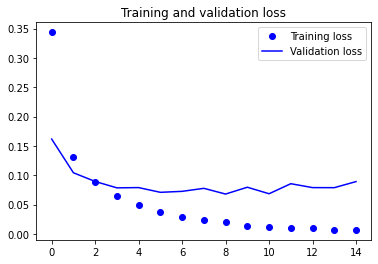

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#Fashion Mnist

In [0]:
from keras.datasets import fashion_mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


###Análisis exploratorio de datos

(28, 28)

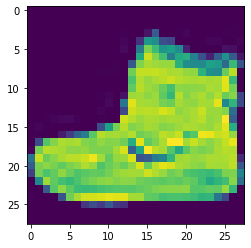

In [0]:
#plot the first image in the dataset
plt.imshow(X_train[0])

#check image shape
X_train[0].shape    

###Procesamiento de datos

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

###Construccion del modelo

In [0]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(6, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2))
model.add(Conv2D(12, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(12, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

###Compilando modelo

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 12)          1308      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 12)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)              

###Entrenando modelo

In [0]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 123us/step - loss: 1.3092 - accuracy: 0.6156 - val_loss: 0.7656 - val_accuracy: 0.7236
Epoch 2/15
60000/60000 [==============================] - 7s 120us/step - loss: 0.7075 - accuracy: 0.7440 - val_loss: 0.6787 - val_accuracy: 0.7480
Epoch 3/15
60000/60000 [==============================] - 7s 119us/step - loss: 0.6346 - accuracy: 0.7699 - val_loss: 0.6489 - val_accuracy: 0.7629
Epoch 4/15
60000/60000 [==============================] - 7s 120us/step - loss: 0.5800 - accuracy: 0.7898 - val_loss: 0.5749 - val_accuracy: 0.7919
Epoch 5/15
60000/60000 [==============================] - 7s 121us/step - loss: 0.5418 - accuracy: 0.8032 - val_loss: 0.5696 - val_accuracy: 0.7994
Epoch 6/15
60000/60000 [==============================] - 7s 121us/step - loss: 0.5164 - accuracy: 0.8136 - val_loss: 0.5607 - val_accuracy: 0.7944
Epoch 7/15
60000/60000 [==============================] - 7s 1

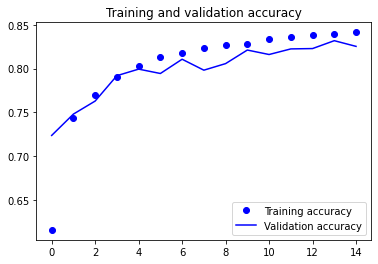

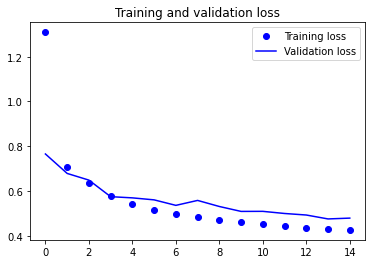

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Ahora el dataset Fasion MNIST

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
model3 = Sequential()
model3.add(Dense(3, activation='relu', input_shape=(dimData,)))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.count_params()

2395

In [0]:
history = model3.fit(train_data, train_labels_one_hot, batch_size=256, epochs=15, verbose=1,
validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model3.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 13us/step - loss: 1.8670 - accuracy: 0.3198 - val_loss: 1.6026 - val_accuracy: 0.4396
Epoch 2/15
60000/60000 [==============================] - 1s 13us/step - loss: 1.4496 - accuracy: 0.4559 - val_loss: 1.3478 - val_accuracy: 0.4554
Epoch 3/15
60000/60000 [==============================] - 1s 13us/step - loss: 1.1832 - accuracy: 0.5667 - val_loss: 1.0588 - val_accuracy: 0.6363
Epoch 4/15
60000/60000 [==============================] - 1s 13us/step - loss: 0.9965 - accuracy: 0.6520 - val_loss: 0.9632 - val_accuracy: 0.6605
Epoch 5/15
60000/60000 [==============================] - 1s 13us/step - loss: 0.9187 - accuracy: 0.6800 - val_loss: 0.8943 - val_accuracy: 0.6997
Epoch 6/15
60000/60000 [==============================] - 1s 13us/step - loss: 0.8462 - accuracy: 0.7240 - val_loss: 0.8233 - val_accuracy: 0.7386
Epoch 7/15
60000/60000 [==============================] - 1s 13us/st

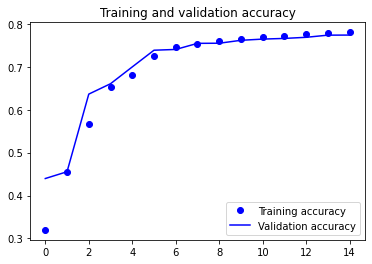

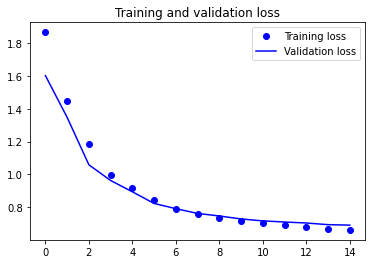

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Resultados y conclusiones

Se utilizaron la misma cantidad de parametros entrenables en una red convolucional y en una red feedfordward. Para la tarea de clasificar imagenes pequeñas en blanco y negro. \\
Los resultados son los siguientes: \\
Dataset MNIST numeros: \\


*   Accuracy con red convolucional 2d: 0.9770
*   Accuracy con red FF: 0.9782


Dataset MNIST Fashion: \\

*   Accuracy con red convolucional 2d: 0.8729
*   Accuracy con red FF: 0.8734

Se observa que ambas arquitecturas tienen un rendimiento similar en estos dataset. \\

Se cree que esto es resultado de que el dataset es muy simple, solo tiene colores en blanco y negro, las imagenes son pequeñas y mayormente centradas. \\

Además se tienen demasiados parametros entrenables, por lo que la complejidad de la red es bastante alta y el problema se hace trivial finalmente para estas redes super poderosas. \\

Se cree que usar una red Conv para este dataset es una haerramienta demasiado soficsticada. \\

Probaremos con otro dataset, con resolución de imagen mayor.

## Nuevo Dataset: CIFAR10: 10.000 imagenes de 32x32 a color en 10 categorias

In [0]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

(10000, 32, 32, 3)

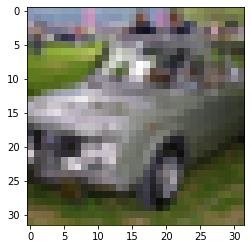

In [0]:
#plot the first image in the dataset
plt.imshow(X_train[44])

#check image shape
X_train.shape
X_test.shape  

In [0]:
#reshape data to fit model
X_train = X_train.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)

In [0]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

De aqui en adelante. Aprendimos a reestructurar mejor las capas, usando pooling y capas densas de salida para utilizar una menor cantidad de parametros.

In [0]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(24, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

### Calculando la cantidad de parametros

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 24)          6936      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 24)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 96)              

In [0]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=250)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 2s 36us/step - loss: 3.1980 - accuracy: 0.1036 - val_loss: 2.2993 - val_accuracy: 0.1061
Epoch 2/25
50000/50000 [==============================] - 2s 32us/step - loss: 2.2908 - accuracy: 0.1143 - val_loss: 2.2851 - val_accuracy: 0.1297
Epoch 3/25
50000/50000 [==============================] - 2s 32us/step - loss: 2.2099 - accuracy: 0.1827 - val_loss: 2.0051 - val_accuracy: 0.2338
Epoch 4/25
50000/50000 [==============================] - 2s 32us/step - loss: 1.8573 - accuracy: 0.3086 - val_loss: 1.7673 - val_accuracy: 0.3467
Epoch 5/25
50000/50000 [==============================] - 2s 32us/step - loss: 1.7172 - accuracy: 0.3690 - val_loss: 1.6925 - val_accuracy: 0.3686
Epoch 6/25
50000/50000 [==============================] - 2s 32us/step - loss: 1.6123 - accuracy: 0.4100 - val_loss: 1.5461 - val_accuracy: 0.4330
Epoch 7/25
50000/50000 [==============================] - 2s 32us/st

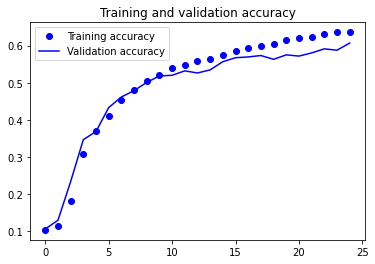

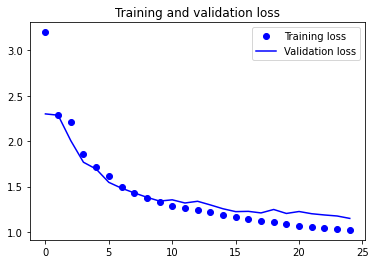

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Resultado y analisis

Al utilizar imagenes con colores se aprecia una baja significativa en la accuracy. Utilizando 12.970 parametros, 2 capas convolucionales , 3 capas de pooling y 50 epocas se tiene como maximo un accuracy de 0.6538. \\ 
Lo cual es decente, considerando que elegir al azar nos daria un accuracy teorico de 0.1.

## Prueba de red FF con 13.000 parametros

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Change from matrix to array of dimension 32x32 to array of dimention 1024
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [0]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [0]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(dimData,)))
model.add(Dense(6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Calculo cantidad de parametros

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.count_params()
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 4)                 12292     
_________________________________________________________________
dense_61 (Dense)             (None, 6)                 30        
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_63 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_64 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                110       
Total params: 12,688
Trainable params: 12,688
Non-trainable params: 0
_________________________________________________

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=250, epochs=25, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 1s 25us/step - loss: 2.2380 - accuracy: 0.1525 - val_loss: 2.1548 - val_accuracy: 0.1733
Epoch 2/25
50000/50000 [==============================] - 1s 21us/step - loss: 2.1184 - accuracy: 0.1787 - val_loss: 2.0798 - val_accuracy: 0.1801
Epoch 3/25
50000/50000 [==============================] - 1s 21us/step - loss: 2.0714 - accuracy: 0.1832 - val_loss: 2.0589 - val_accuracy: 0.1840
Epoch 4/25
50000/50000 [==============================] - 1s 22us/step - loss: 2.0649 - accuracy: 0.1830 - val_loss: 2.0529 - val_accuracy: 0.1835
Epoch 5/25
50000/50000 [==============================] - 1s 21us/step - loss: 2.0537 - accuracy: 0.1849 - val_loss: 2.0580 - val_accuracy: 0.1890
Epoch 6/25
50000/50000 [==============================] - 1s 21us/step - loss: 2.0522 - accuracy: 0.1860 - val_loss: 2.0445 - val_accuracy: 0.1931
Epoch 7/25
50000/50000 [==============================] - 1s 22us/st

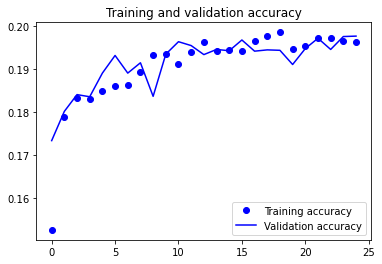

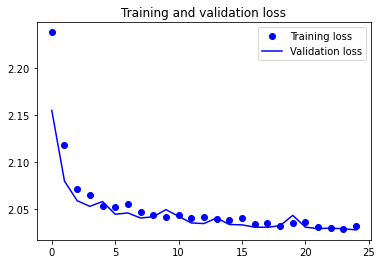

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Resultado y analisis
Utilizando una red Fed-fordward con 12578 parametros y 5 capas
El resultado de la accuracy es 0.2805. Mientras, la red convolucional es bastante mejor con un 0.6538. \\
Podemos notar que incluso utilizando una cantidad relativamente pequeña de parametros, la red convolucional es capaz de reconocer patrones espaciales de manera efectiva y clasificar bien imagenes.

# Dataset artificial

Para esta sección del taller utilizaremos una funcion sinusoidal generada aleatoriamente por numpy. Se generan $2000$ series de tiempo de la función $\sin({2x + 1})$. Cada serie de tiempo tendrá 5 inputs y un output, que representan 5 valores de la función, se busca estimar el sexto punto a partir de los 5 anteriores. Utilizaremos estas series para generar un subset de entrenamiento y otro de validación. \\
Sobre estos sets utilizaremos una red Feed Fordward y una red Convolucional 1D con una cantidad similar de parametros entrenable para analizar experimentalmente el aprendizaje de las redes.

In [0]:
# Generación de datos
points = np.random.uniform(0,5,(2000,))

series = list()
def generateTimeSerie(a):
    b = np.random.random_sample(size=None)
    return [np.sin(2*(a)+1), np.sin(2*(a+b)+1), np.sin(2*(a+2*b)+1), np.sin(2*(a+3*b)+1), np.sin(2*(a+4*b)+1), np.sin(2*(a+5*b)+1), np.sin(2*(a+6*b)+1), np.sin(2*(a+7*b)+1), np.sin(2*(a+8*b)+1)]

for p in points:
  series.append(generateTimeSerie(p))

X = list()
y = list()

for s in series:
  X.append(s[0:8])
  y.append(s[8])
X = np.array(X)
y = np.array(y)

# Split entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [0]:
#Creando el modelo de red Feed Fordward
modelSineFF = Sequential()
modelSineFF.add(Dense(8, input_shape=(8,), activation='relu'))
modelSineFF.add(Dense(8, activation='relu'))
modelSineFF.add(Dense(1, activation='linear'))

In [0]:
#Compilando el modelo
modelSineFF.compile(loss='mse', optimizer='adam', metrics=['mae'])
modelSineFF.count_params()

153

In [0]:
#entrenando el modelo
#modelSineFF.fit(X_train, y_train, epochs=50, batch_size=25, verbose=2)
historySineFF = modelSineFF.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=25, verbose=1)

Train on 1600 samples, validate on 400 samples
Epoch 1/50
1600/1600 [==============================] - 0s 176us/step - loss: 0.6272 - mae: 0.6675 - val_loss: 0.4849 - val_mae: 0.6099
Epoch 2/50
1600/1600 [==============================] - 0s 119us/step - loss: 0.4627 - mae: 0.5930 - val_loss: 0.4218 - val_mae: 0.5698
Epoch 3/50
1600/1600 [==============================] - 0s 112us/step - loss: 0.4032 - mae: 0.5561 - val_loss: 0.3863 - val_mae: 0.5416
Epoch 4/50
1600/1600 [==============================] - 0s 113us/step - loss: 0.3669 - mae: 0.5272 - val_loss: 0.3565 - val_mae: 0.5162
Epoch 5/50
1600/1600 [==============================] - 0s 117us/step - loss: 0.3359 - mae: 0.5006 - val_loss: 0.3231 - val_mae: 0.4870
Epoch 6/50
1600/1600 [==============================] - 0s 107us/step - loss: 0.3050 - mae: 0.4722 - val_loss: 0.2888 - val_mae: 0.4558
Epoch 7/50
1600/1600 [==============================] - 0s 115us/step - loss: 0.2741 - mae: 0.4427 - val_loss: 0.2558 - val_mae: 0.4250
E

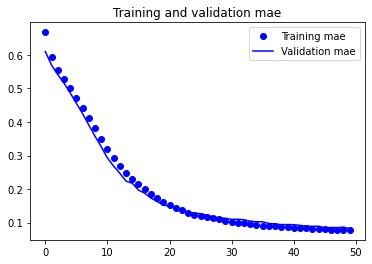

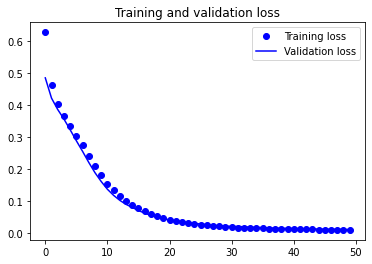

In [0]:
mae = historySineFF.history['mae']
val_mae = historySineFF.history['val_mae']
loss = historySineFF.history['loss']
val_loss = historySineFF.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
series = list()
def generateTimeSerie2(a):
    b = np.random.random_sample(size=None)
    return [[np.sin(2*(a)+1)], [np.sin(2*(a+b)+1)], [np.sin(2*(a+2*b)+1)], [np.sin(2*(a+3*b)+1)], [np.sin(2*(a+4*b)+1)], [np.sin(2*(a+5*b)+1)], [np.sin(2*(a+6*b)+1)], [np.sin(2*(a+7*b)+1)], np.sin(2*(a+8*b)+1)]

for p in points:
  series.append(generateTimeSerie2(p))

X = list()
y = list()

for s in series:
  X.append(s[0:8])
  y.append(s[8])
X = np.array(X)
y = np.array(y)

# Split entre train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
X_train.shape

(1600, 8, 1)

In [0]:
#Creando el modelo de red conv 1D
modelSine1D = Sequential()
modelSine1D.add(Conv1D(4, kernel_size=3, activation='relu', input_shape=(8,1)))
modelSine1D.add(Conv1D(8, kernel_size=3, activation='relu', input_shape=(8,1)))
modelSine1D.add(MaxPool1D(2))
modelSine1D.add(Flatten())
modelSine1D.add(Dense(4, activation='relu'))
modelSine1D.add(Dense(1, activation='linear'))

In [0]:
#Compilando el modelo
modelSine1D.compile(loss='mse', optimizer='adam', metrics=['mae'])
modelSine1D.count_params()
print(modelSine1D.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 6, 4)              16        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 8)              104       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 8)              0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 5         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_______________________________________________________

In [0]:
#entrenando el modelo
historySineFF = modelSine1D.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=25, verbose=1)

Train on 1600 samples, validate on 400 samples
Epoch 1/50
1600/1600 [==============================] - 0s 240us/step - loss: 0.4930 - mae: 0.6235 - val_loss: 0.4903 - val_mae: 0.6303
Epoch 2/50
1600/1600 [==============================] - 0s 155us/step - loss: 0.4605 - mae: 0.6048 - val_loss: 0.4683 - val_mae: 0.6126
Epoch 3/50
1600/1600 [==============================] - 0s 143us/step - loss: 0.4385 - mae: 0.5893 - val_loss: 0.4471 - val_mae: 0.5969
Epoch 4/50
1600/1600 [==============================] - 0s 140us/step - loss: 0.4102 - mae: 0.5673 - val_loss: 0.4152 - val_mae: 0.5745
Epoch 5/50
1600/1600 [==============================] - 0s 147us/step - loss: 0.3717 - mae: 0.5343 - val_loss: 0.3702 - val_mae: 0.5392
Epoch 6/50
1600/1600 [==============================] - 0s 148us/step - loss: 0.3158 - mae: 0.4894 - val_loss: 0.2958 - val_mae: 0.4799
Epoch 7/50
1600/1600 [==============================] - 0s 144us/step - loss: 0.2541 - mae: 0.4347 - val_loss: 0.2271 - val_mae: 0.4158
E

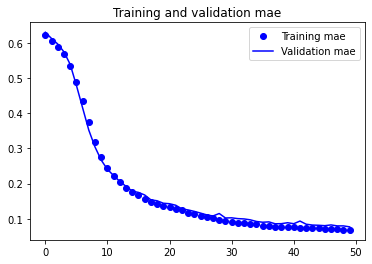

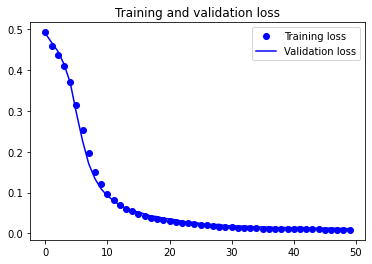

In [0]:
mae = historySineFF.history['mae']
val_mae = historySineFF.history['val_mae']
loss = historySineFF.history['loss']
val_loss = historySineFF.history['val_loss']

epochs = range(len(mae))

plt.plot(epochs, mae, 'bo', label='Training mae')
plt.plot(epochs, val_mae, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Conclusiones Generales

El tamaño del input condiciona la arquitectura de la red CNN, por ejemplo con un input de 32x32 si se quiere utilizar pooling, la red no será muy profunda (se vuelve dificil ocupar más de 3 poolings). 
